In [1]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'C:\\Users\\LENOVO\\projects\\fer\\train'
TEST_DIR = 'C:\\Users\\LENOVO\\projects\\fer\\test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)


                                                   image     label
0      C:\Users\LENOVO\projects\fer\train\angry\Train...     angry
1      C:\Users\LENOVO\projects\fer\train\angry\Train...     angry
2      C:\Users\LENOVO\projects\fer\train\angry\Train...     angry
3      C:\Users\LENOVO\projects\fer\train\angry\Train...     angry
4      C:\Users\LENOVO\projects\fer\train\angry\Train...     angry
...                                                  ...       ...
28704  C:\Users\LENOVO\projects\fer\train\surprise\Tr...  surprise
28705  C:\Users\LENOVO\projects\fer\train\surprise\Tr...  surprise
28706  C:\Users\LENOVO\projects\fer\train\surprise\Tr...  surprise
28707  C:\Users\LENOVO\projects\fer\train\surprise\Tr...  surprise
28708  C:\Users\LENOVO\projects\fer\train\surprise\Tr...  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\LENOVO\projects\fer\test\angry\Privat...     angry
1     C:\Users\LENOVO\projects\fer\test\angry\Privat...     angry
2     C:\Users\LENOVO\projects\fer\test\angry\Privat...     angry
3     C:\Users\LENOVO\projects\fer\test\angry\Privat...     angry
4     C:\Users\LENOVO\projects\fer\test\angry\Privat...     angry
...                                                 ...       ...
7173  C:\Users\LENOVO\projects\fer\test\surprise\Pub...  surprise
7174  C:\Users\LENOVO\projects\fer\test\surprise\Pub...  surprise
7175  C:\Users\LENOVO\projects\fer\test\surprise\Pub...  surprise
7176  C:\Users\LENOVO\projects\fer\test\surprise\Pub...  surprise
7177  C:\Users\LENOVO\projects\fer\test\surprise\Pub...  surprise

[7178 rows x 2 columns]
0       C:\Users\LENOVO\projects\fer\test\angry\Privat...
1       C:\Users\LENOVO\projects\fer\test\angry\Privat...
2       C:\Users\LENOVO\projects\fer\test\angry\Privat...
3       C

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = "grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 


  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\LENOVO\anaconda3\envs\IDL\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
225/225 [==============================] - 1633s 7s/step - loss: 1.8259 - accuracy: 0.2474 - val_loss: 1.8115 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 804s 4s/step - loss: 1.7993 - accuracy: 0.2540 - val_loss: 1.7673 - val_accuracy: 0.2556
Epoch 3/100
225/225 [==============================] - 605s 3s/step - loss: 1.7097 - accuracy: 0.3015 - val_loss: 1.6073 - val_accuracy: 0.3835
Epoch 4/100
225/225 [==============================] - 691s 3s/step - loss: 1.5765 - accuracy: 0.3773 - val_loss: 1.4478 - val_accuracy: 0.4313
Epoch 5/100
225/225 [==============================] - 1169s 5s/step - loss: 1.4836 - accuracy: 0.4230 - val_loss: 1.3439 - val_accuracy: 0.4822
Epoch 6/100
225/225 [==============================] - 1168s 5s/step - loss: 1.4179 - accuracy: 0.4534 - val_loss: 1.3021 - val_accuracy: 0.4969
Epoch 7/100
225/225 [==============================] - 1175s 5s/step - loss: 1.3740 - accuracy: 0.4745 - val_loss: 1.2695 - val_accur

225/225 [==============================] - 351s 2s/step - loss: 0.9259 - accuracy: 0.6570 - val_loss: 1.0277 - val_accuracy: 0.6154
Epoch 58/100
225/225 [==============================] - 351s 2s/step - loss: 0.9235 - accuracy: 0.6556 - val_loss: 1.0222 - val_accuracy: 0.6190
Epoch 59/100
225/225 [==============================] - 355s 2s/step - loss: 0.9145 - accuracy: 0.6597 - val_loss: 1.0352 - val_accuracy: 0.6172
Epoch 60/100
225/225 [==============================] - 351s 2s/step - loss: 0.9101 - accuracy: 0.6621 - val_loss: 1.0204 - val_accuracy: 0.6215
Epoch 61/100
225/225 [==============================] - 352s 2s/step - loss: 0.9042 - accuracy: 0.6652 - val_loss: 1.0266 - val_accuracy: 0.6247
Epoch 62/100
225/225 [==============================] - 350s 2s/step - loss: 0.8955 - accuracy: 0.6678 - val_loss: 1.0286 - val_accuracy: 0.6239
Epoch 63/100
225/225 [==============================] - 351s 2s/step - loss: 0.8947 - accuracy: 0.6673 - val_loss: 1.0183 - val_accuracy: 0.617

In [23]:
model.save('FER_model.h5')

In [24]:
from keras.models import load_model

In [25]:
loaded_model = load_model('FER_model.h5')

In [26]:
eval_results = loaded_model.evaluate(x_test, y_test)

225/225 [==============================] - 39s 173ms/step - loss: 1.0360 - accuracy: 0.6311


In [27]:
print(f"Test Loss: {eval_results[0]:.4f}")
print(f"Test Accuracy: {eval_results[1]*100:.2f}%")

Test Loss: 1.0360
Test Accuracy: 63.11%


In [28]:
predictions = loaded_model.predict(x_test)

225/225 [==============================] - 41s 181ms/step


In [30]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 63.11%


In [34]:
conf_mat = confusion_matrix(true_labels, predicted_labels)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
class_labels = ['angry','disgust','fear','happy','neutral','sad','surprise']


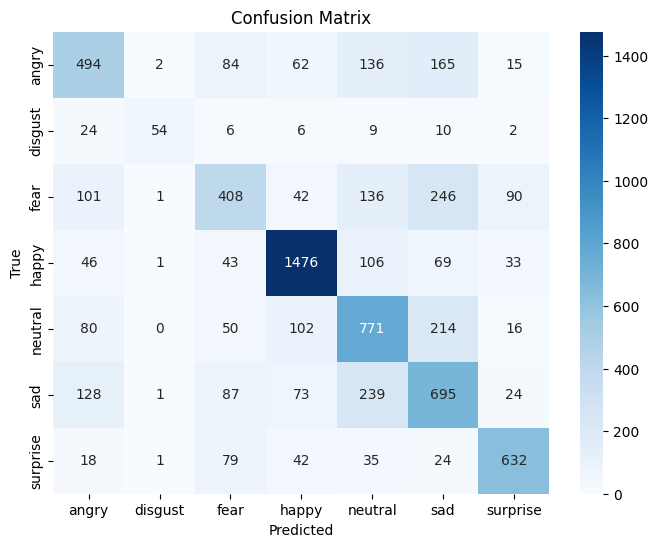

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(os.getcwd())

C:\Users\LENOVO
